In [10]:
import os
from dotenv import load_dotenv
load_dotenv()
roboflow_api_key = os.getenv("ROBOFLOW_API_KEY")

In [11]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=roboflow_api_key
)

result = CLIENT.infer("test1.jpg", model_id="emergency-response/1")

In [12]:
if result['predictions'][0]['confidence'] > 0.5:
    print("Violence detected!")

Violence detected!


In [2]:
from inference import get_model
import supervision as sv
import cv2

model = get_model(model_id="emergency-response/1")

def infer_image(image_path):
    # define the image url to use for inference
    image_file = image_path
    image = cv2.imread(image_file)

    # load a pre-trained yolov8n model

    results = model.infer(image)[0]
    detections = sv.Detections.from_inference(results)

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    # annotate the image with our inference results
    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

    sv.plot_image(annotated_image)

[09/24/24 15:13:18] WARNING  Your inference package version 0.19.0 is out of date! Please upgrade to ]8;id=990541;file:///home/jivan-acharya/Documents/Code/Emergency-Response/venv/lib/python3.10/site-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=51314;file:///home/jivan-acharya/Documents/Code/Emergency-Response/venv/lib/python3.10/site-packages/inference/core/__init__.py#41\41]8;;\
                             version 0.20.0 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


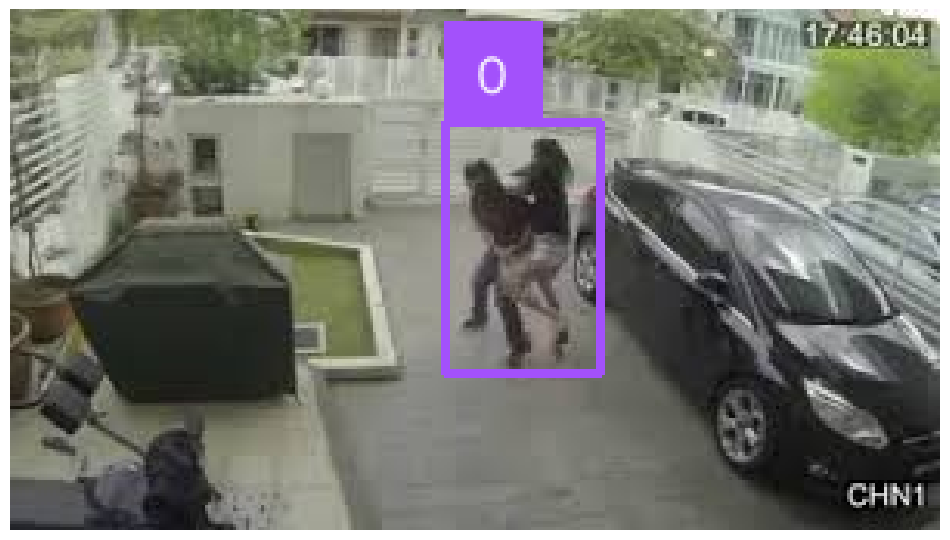

In [3]:
infer_image("test1.jpg")

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


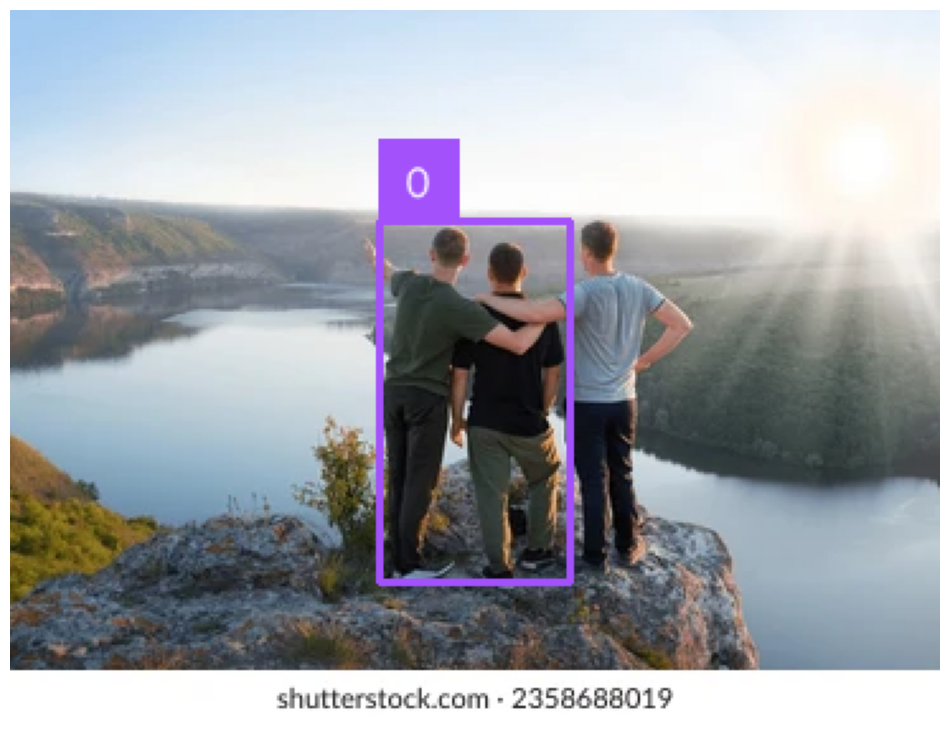

In [4]:
infer_image("3guys.webp")

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


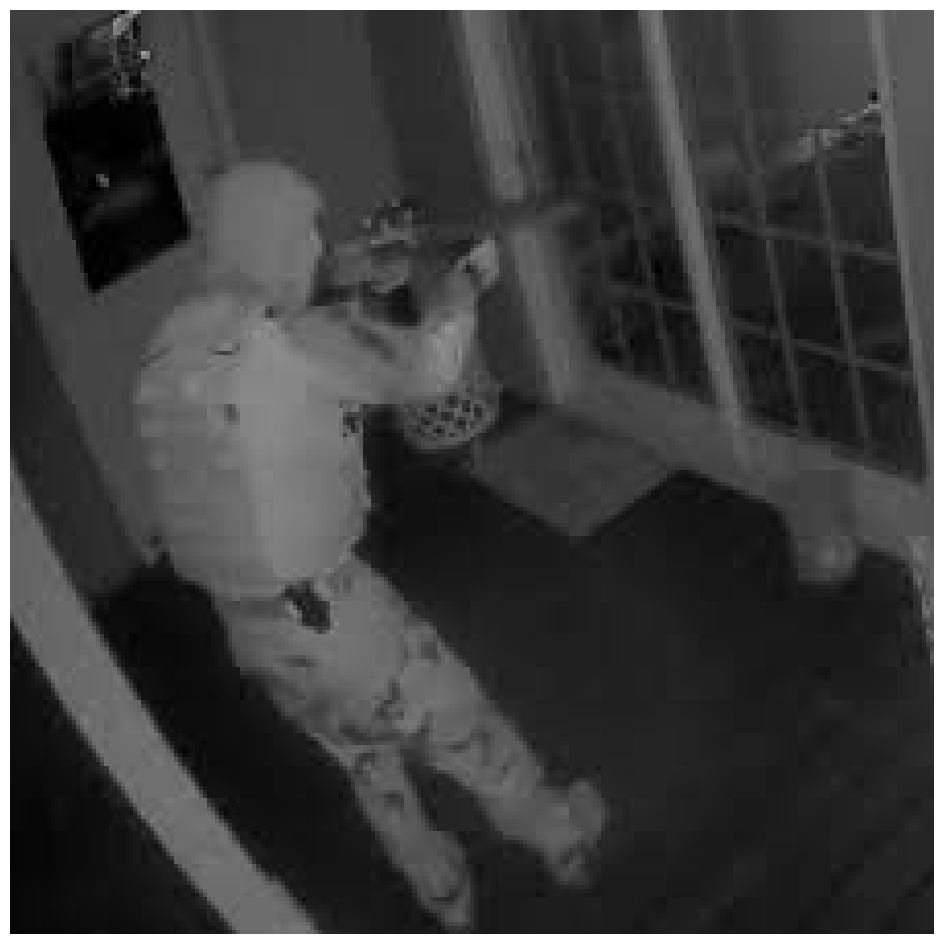

In [7]:
infer_image("guy_pointing_gun.jpeg")